Certainly! Here's a README file for your project, based on the code you provided:

---

# AutoML Data Analysis and Model Selection

AutoML Data Analysis and Model Selection is a Python-based tool that streamlines the process of data analysis, data preprocessing, exploratory data analysis (EDA), and model selection. This tool leverages the PyCaret library for efficient AutoML workflows.

## Table of Contents

- [Overview](#overview)
- [Features](#features)
- [Prerequisites](#prerequisites)
- [Getting Started](#getting-started)
  - [Installation](#installation)
  - [Usage](#usage)

## Overview

AutoML Data Analysis and Model Selection is designed to simplify the process of working with datasets, whether for regression or classification tasks. It combines automated data preprocessing, exploratory data analysis, visualization, and model selection into a streamlined workflow. With interactive features and visualization tools, it helps data scientists and analysts make informed decisions about their datasets.

## Features

- Automated data preprocessing, including handling missing values and categorical encoding.
- Interactive EDA with visualizations like heatmaps, pair plots, histograms, and more.
- Support for both CSV and Excel data file formats.
- Selection of the best machine learning model based on the type of task (Regression or Classification).
- Option to customize the data preprocessing and visualization steps.

## Prerequisites

Before using AutoML Data Analysis and Model Selection, make sure you have the following prerequisites installed:

- Python 3.x
- Pip package manager

## Getting Started

### Installation

1. Clone or download the project repository to your local machine.

2. Install the required Python packages:

   ```bash
   pip install pandas scikit-learn pycaret matplotlib seaborn
   ```

### Usage

1. Navigate to the project directory.

2. Run the script `auto_ml_analysis.py` by executing the following command:

   ```bash
   python auto_ml_analysis.py
   ```

3. Follow the prompts to provide the path to your dataset, the target variable, and the task type (Regression or Classification).

4. The tool will perform automated data preprocessing and generate EDA visualizations.

5. After EDA, it will identify and remove columns with missing values and encode categorical features.

6. EDA visualizations, including heatmaps, pair plots, histograms, and more, will be displayed.

7. The tool will set up an AutoML environment using PyCaret and select the best machine learning model based on your task type.

8. The best model and its performance report will be displayed.




### Exploratory Data Analysis (EDA)

Count Number of Missing Values on Each Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Total Features with Missing Values: 1
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes

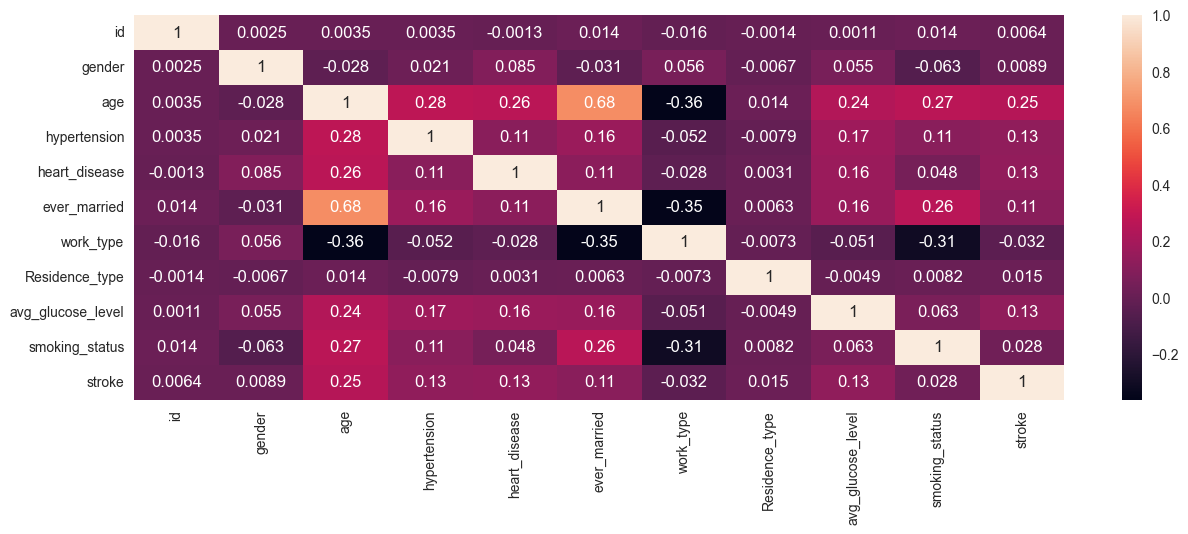

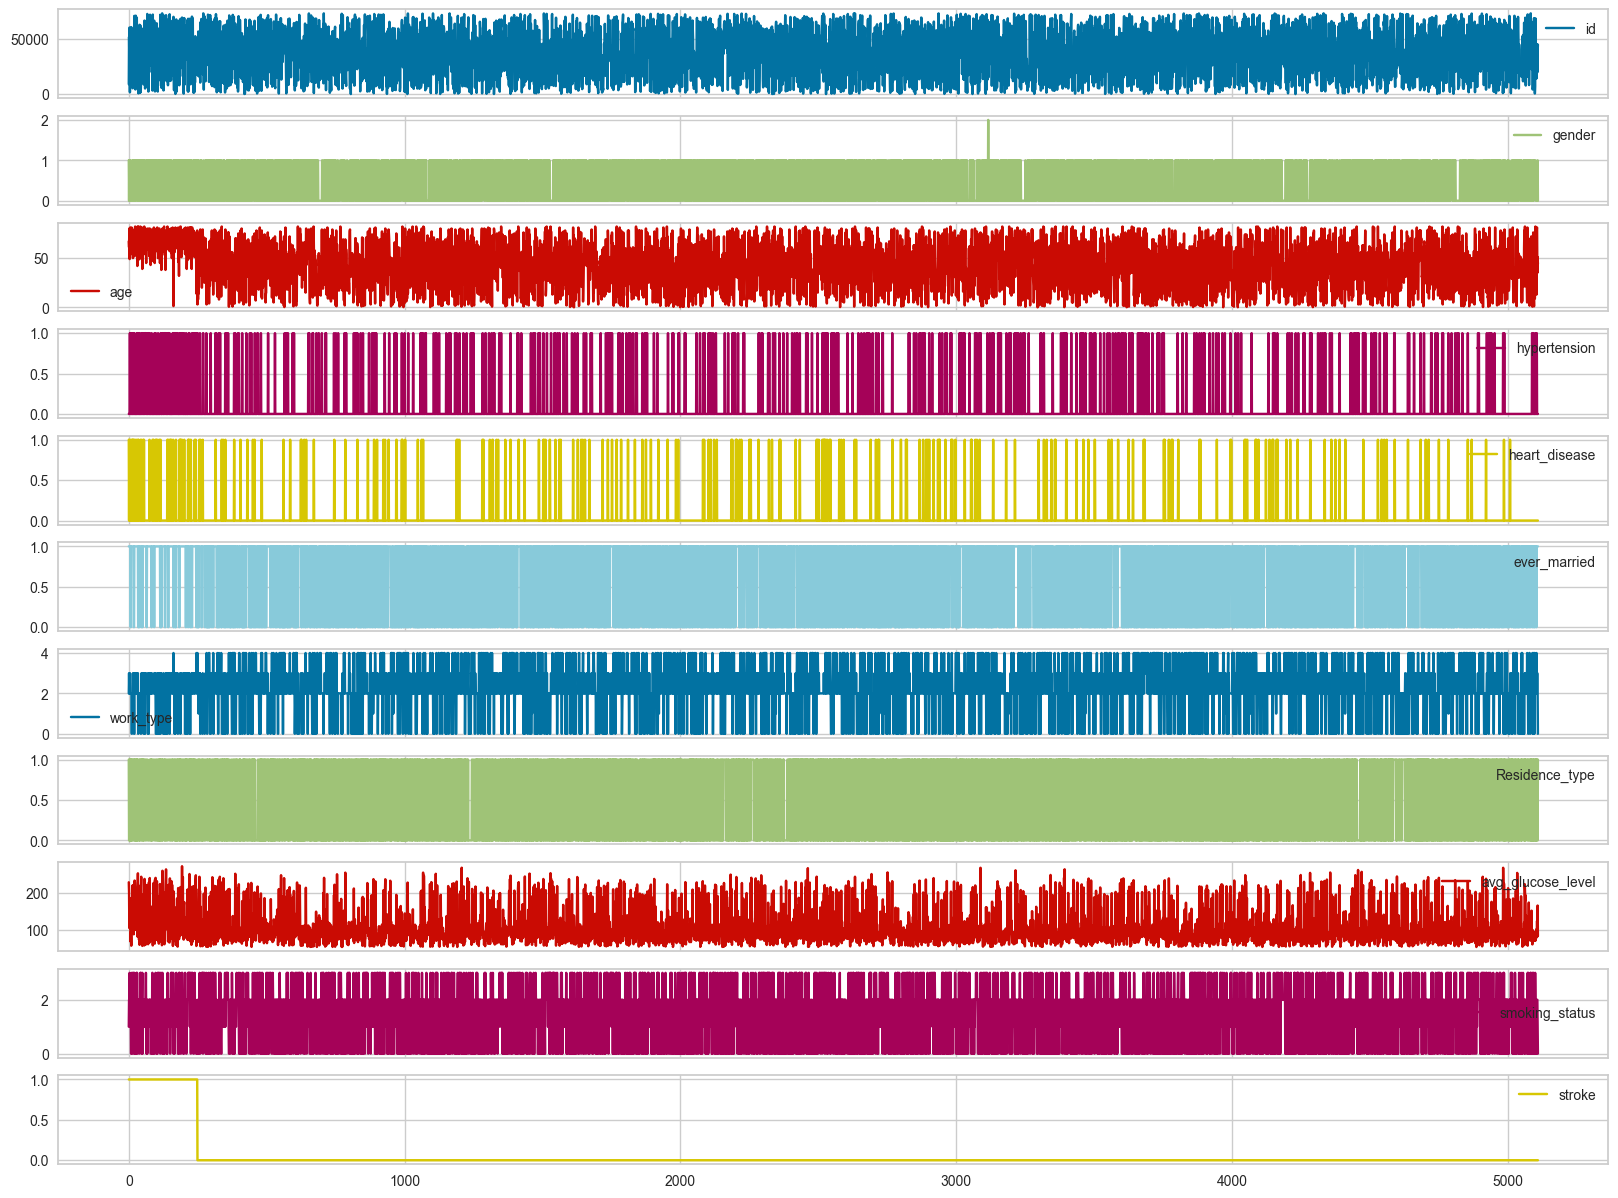

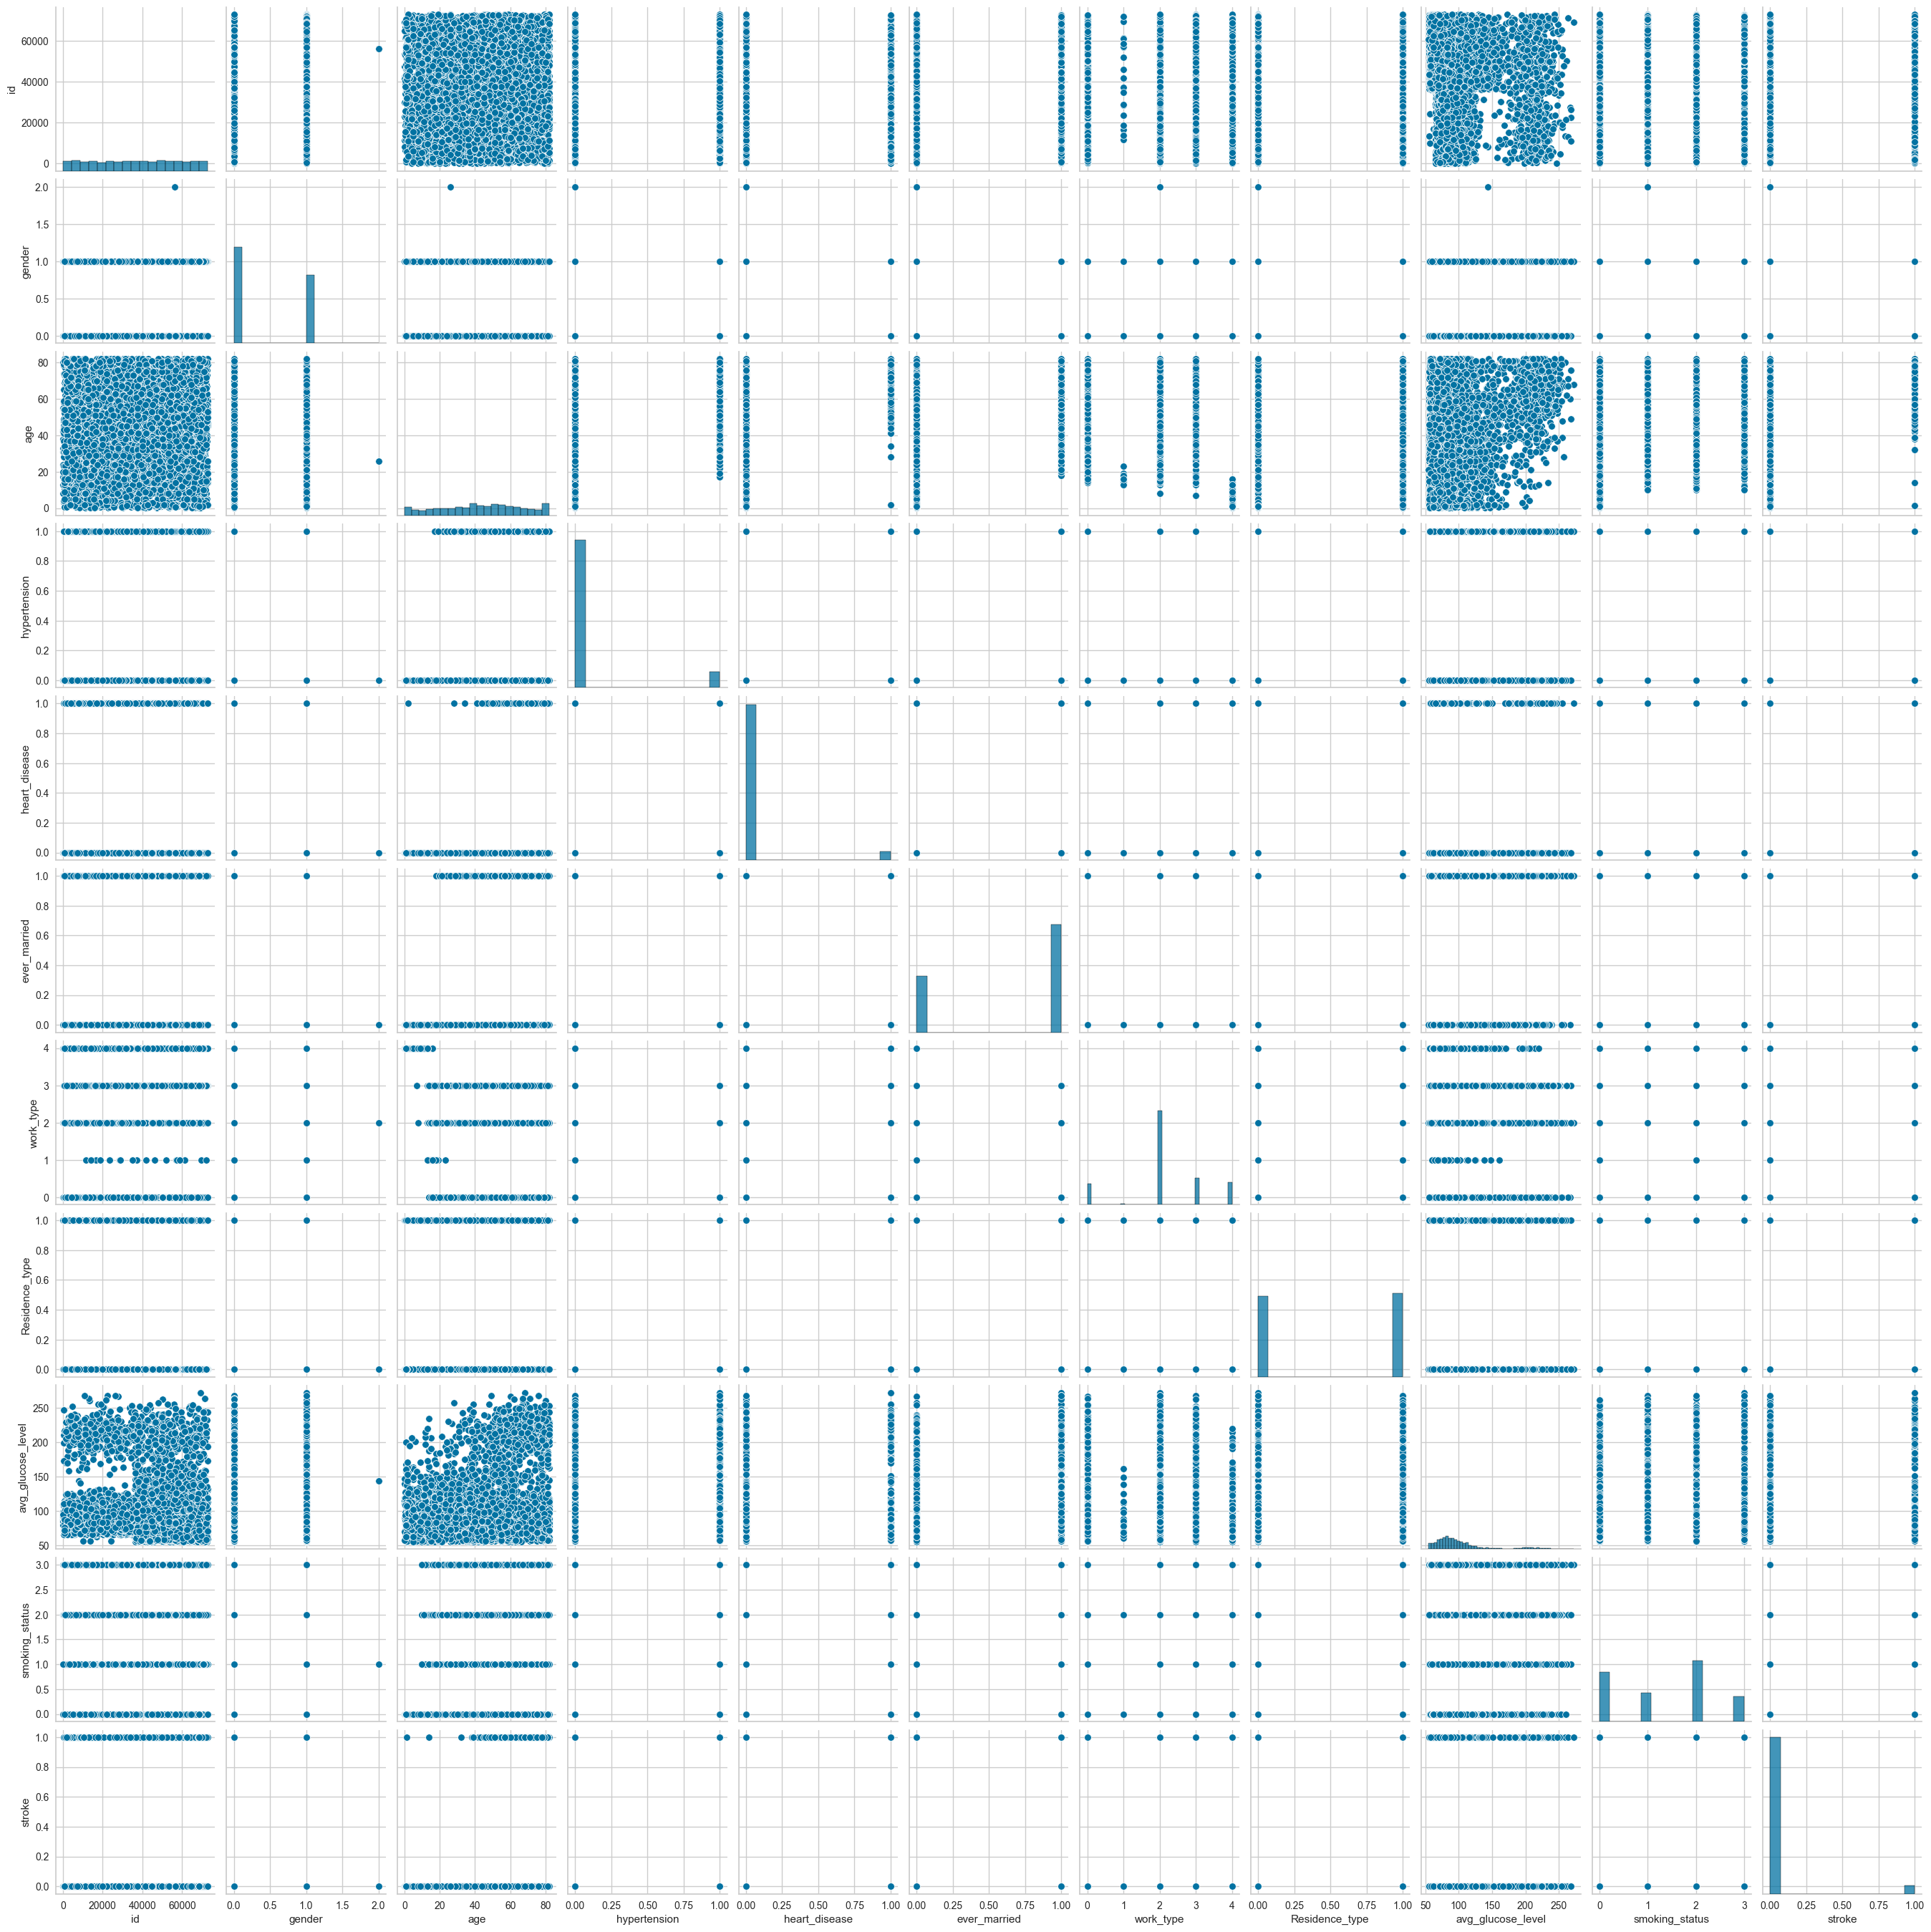

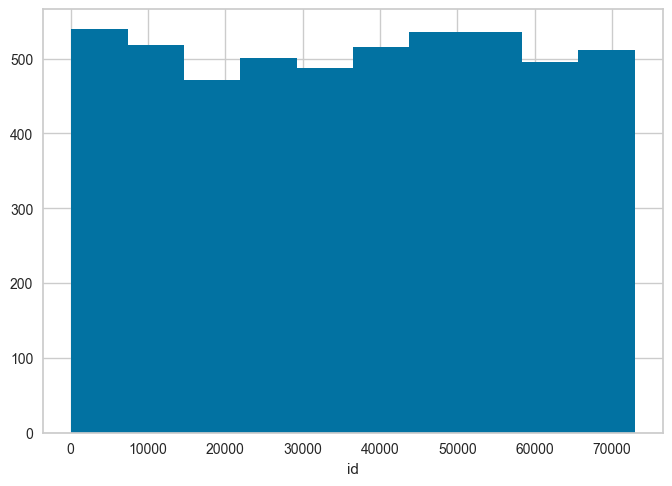

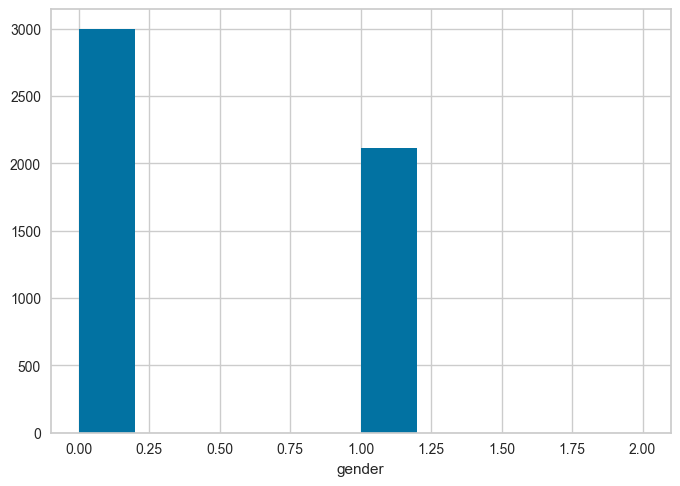

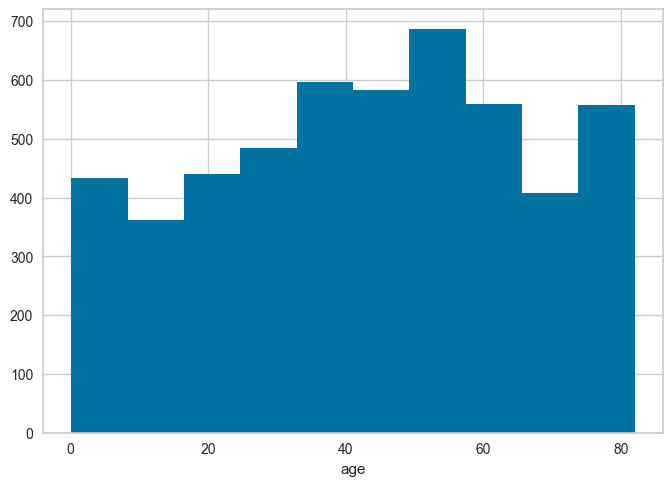

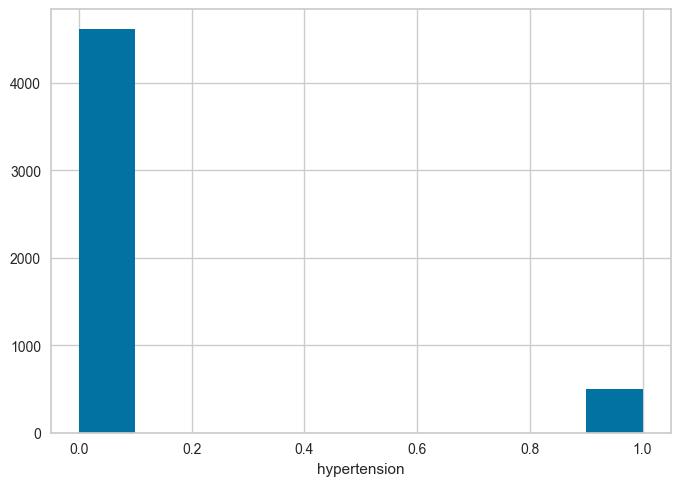

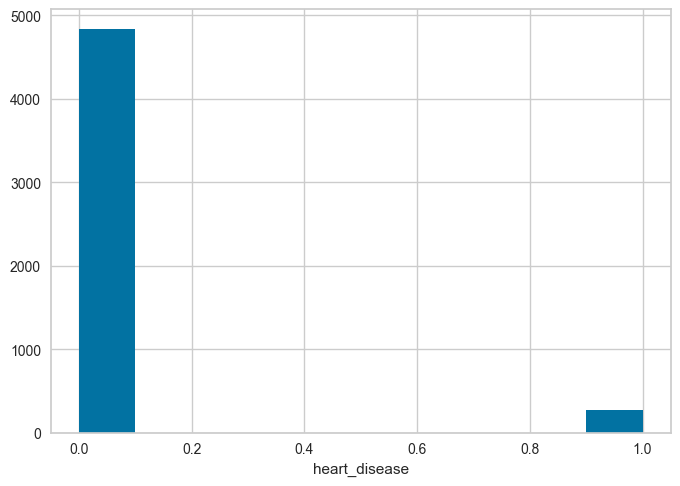

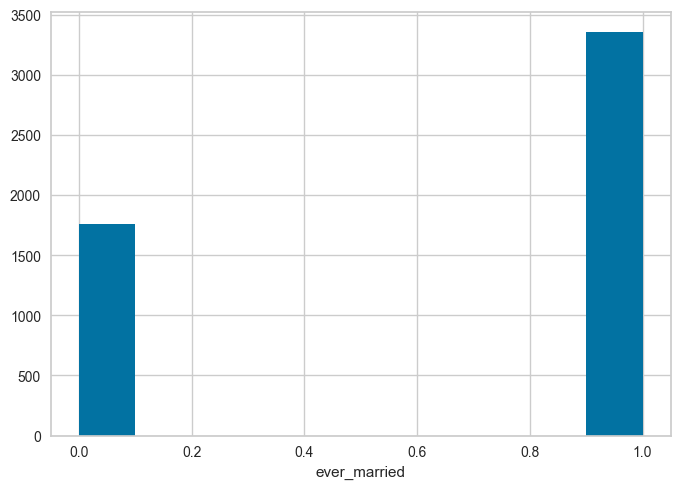

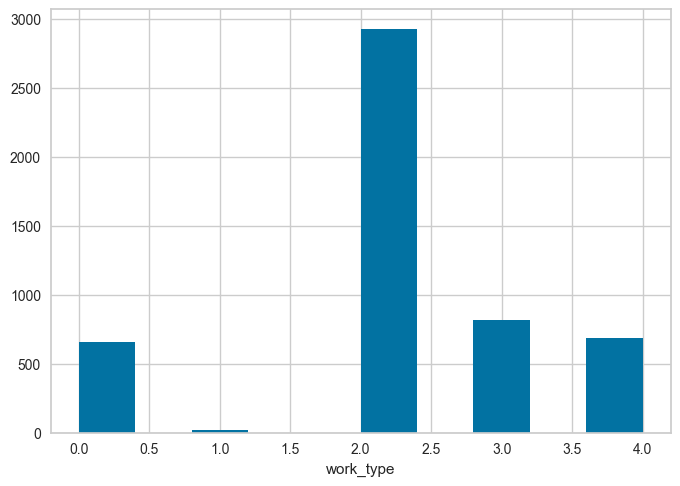

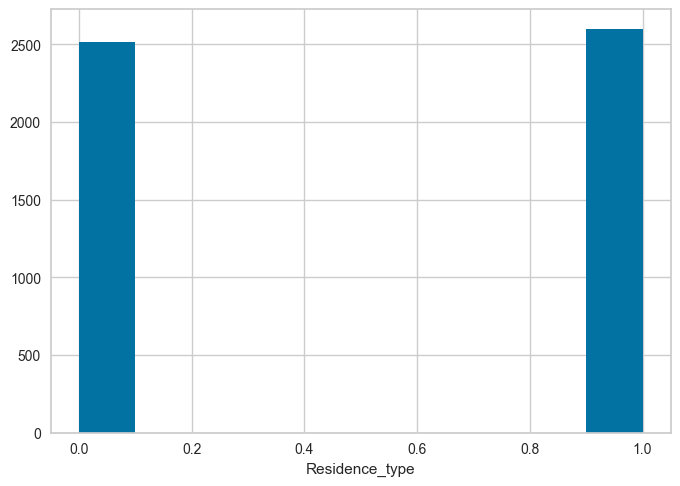

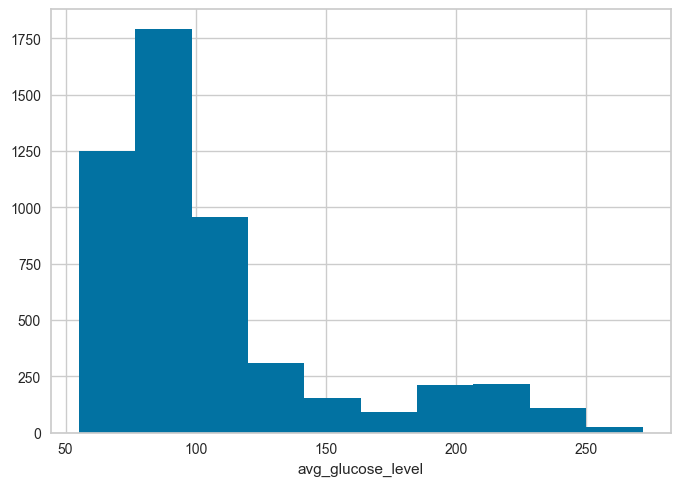

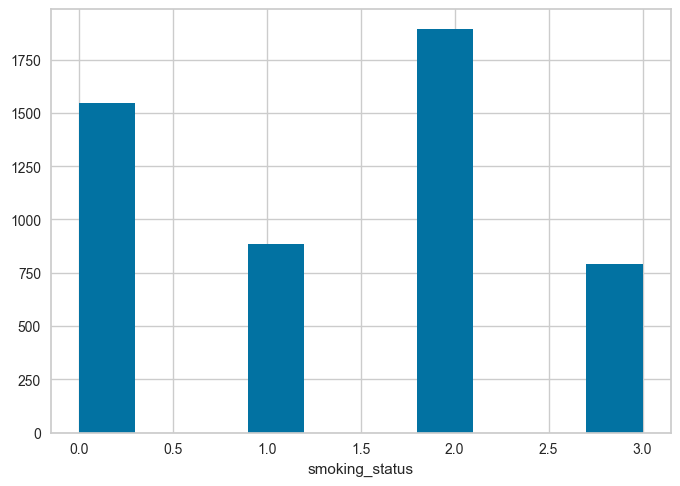

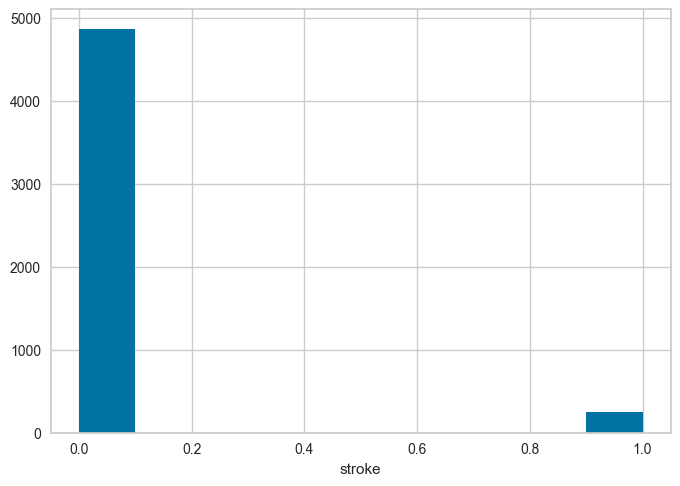

### Model Comparison


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,10.5980,184.7328,13.5558,0.6290,0.3943,0.4913,0.2660
lightgbm,Light Gradient Boosting Machine,10.8344,196.9788,14.0045,0.6046,0.4066,0.5118,0.2240
rf,Random Forest Regressor,11.0937,206.4467,14.3428,0.5853,0.4117,0.5214,0.7840
ada,AdaBoost Regressor,12.1997,226.2547,15.0150,0.5455,0.4275,0.5598,0.0640
et,Extra Trees Regressor,11.7892,237.6619,15.3982,0.5227,0.4402,0.5422,0.4420
lar,Least Angle Regression,12.2275,240.3006,15.4530,0.5177,0.5502,0.9887,0.0220
lr,Linear Regression,12.2393,240.4579,15.4586,0.5174,0.5517,0.9974,1.3260
ridge,Ridge Regression,12.2434,240.4889,15.4596,0.5173,0.5520,0.9986,0.0220
br,Bayesian Ridge,12.2473,240.5201,15.4607,0.5173,0.5522,0.9997,0.0980
lasso,Lasso Regression,13.3765,271.7590,16.4309,0.4548,0.6111,1.2460,0.0200


### Best Model
Best Model:
GradientBoostingRegressor(random_state=42)


In [2]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *
from pycaret.regression import *

# Suppress PyCaret log messages
logger = logging.getLogger('pycaret')
logger.setLevel(logging.ERROR)

# Function to load data based on file format
def load_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        return pd.read_excel(file_path)
    elif file_path.endswith('.sql'):
        # Add code to read data from SQL file using your preferred method
        # For example, you can use libraries like SQLAlchemy or pandas' read_sql
        # Here's a placeholder to replace with your SQL data loading code
        pass
    else:
        raise ValueError("Unsupported file format")

# Load data
file_name = input('Please enter the path of the file: ')
df = load_data(file_name)

# User inputs for target variable and task type
target_variable = input("Enter the target variable name: ")
task_type = input("Enter the task type (Regression/Classification): ")

# Data preprocessing
# ...

# EDA (Exploratory Data Analysis)
print("### Exploratory Data Analysis (EDA)")

# Method - 1: Count Number of Missing Values on Each Column
print('\nCount Number of Missing Values on Each Column:')
print(df.isnull().sum(axis=0))

# Method - 2: Total Features with Missing Values
feature_count = df.columns[df.isnull().sum() != 0].size
print("\nTotal Features with Missing Values: " + str(feature_count))

# Method - 3: Drop Columns with Missing Values
df = df.drop(df.columns[df.isnull().sum() != 0], axis=1, inplace=False)
print(df)

# Encode Categorical Features
columnsToEncode = list(df.select_dtypes(include=['category', 'object', 'bool']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        df[feature] = le.fit_transform(df[feature])
    except:
        print('Error encoding ' + feature)

# Visualizations
plt.figure(1, figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)

df.plot(subplots=True, figsize=(20, 15))
plt.show()

sns.pairplot(df)
plt.show()

for col in df.columns:
    df[col].hist()
    plt.xlabel(col)
    plt.show()

# PyCaret model comparison
print("### Model Comparison")

# Create an AutoML setup based on the task type (Regression/Classification)
if task_type.lower() == "regression":
    setup(df, target=target_variable, session_id=42, verbose=False)
    best_model = compare_models()
else:
    setup(df, target=target_variable, session_id=42, verbose=False, data_split_shuffle=False)
    best_model = compare_models(fold=5, cross_validation=True)

# Display the best model and its performance report
print("### Best Model")
print("Best Model:")
print(best_model)